# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to getstarted!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None




# Create a new dataframe from your CSV
rats = pd.read_csv('Rat_Sightings.csv')

In [2]:
# Print out any information you need to understand your dataframe
rats.describe()

,Unique Key,Incident Zip,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
count,1.019140e+05,101578.000000,0.0,1.012080e+05,101208.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101208.000000,101208.000000
mean,2.815864e+07,10728.680895,NaN,1.002473e+06,208639.988953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739304,-73.934206
std,6.015376e+06,631.206648,NaN,1.958043e+04,29956.193531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082224,0.070617
min,1.146439e+07,83.000000,NaN,9.134950e+05,121350.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499502,-74.254437
25%,2.341452e+07,10086.250000,NaN,9.936100e+05,186934.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679740,-73.966216
50%,2.883680e+07,10472.000000,NaN,1.001398e+06,203425.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725009,-73.938112
75%,3.346014e+07,11222.000000,NaN,1.011951e+06,236364.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815428,-73.899963
max,3.719700e+07,100354.000000,NaN,1.066922e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912869,-73.701632


In [19]:
rats.shape

(101914, 52)

Now you have a dataframe set up, you are ready to dive in and start cleaning!

In [20]:
rats.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

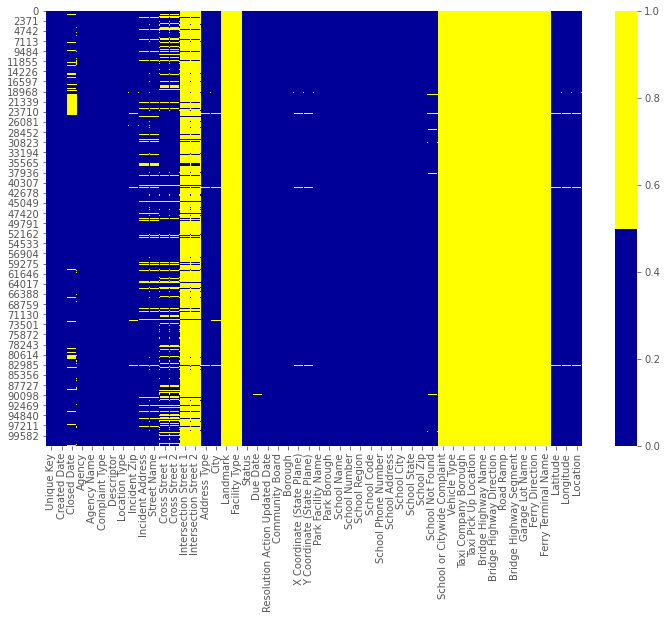

In [21]:
# Plot a heatmap of any missing data
cols = rats.columns[:52]
colours = ['#000099', '#ffff00']
sns.heatmap(rats[cols].isnull(), cmap=sns.color_palette(colours))

In [22]:
# Try out a missing data percentage list! 
for col in rats.columns:
    pct_missing = np.mean(rats[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

Unique Key-0%
Created Date-0%
Closed Date-11%
Agency-0%
Agency Name-0%
Complaint Type-0%
Descriptor-0%
Location Type-0%
Incident Zip-0%
Incident Address-9%
Street Name-9%
Cross Street 1-16%
Cross Street 2-16%
Intersection Street 1-91%
Intersection Street 2-91%
Address Type-0%
City-0%
Landmark-100%
Facility Type-100%
Status-0%
Due Date-0%
Resolution Action Updated Date-0%
Community Board-0%
Borough-0%
X Coordinate (State Plane)-1%
Y Coordinate (State Plane)-1%
Park Facility Name-0%
Park Borough-0%
School Name-0%
School Number-0%
School Region-0%
School Code-0%
School Phone Number-0%
School Address-0%
School City-0%
School State-0%
School Zip-0%
School Not Found-1%
School or Citywide Complaint-100%
Vehicle Type-100%
Taxi Company Borough-100%
Taxi Pick Up Location-100%
Bridge Highway Name-100%
Bridge Highway Direction-100%
Road Ramp-100%
Bridge Highway Segment-100%
Garage Lot Name-100%
Ferry Direction-100%
Ferry Terminal Name-100%
Latitude-1%
Longitude-1%
Location-1%


created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

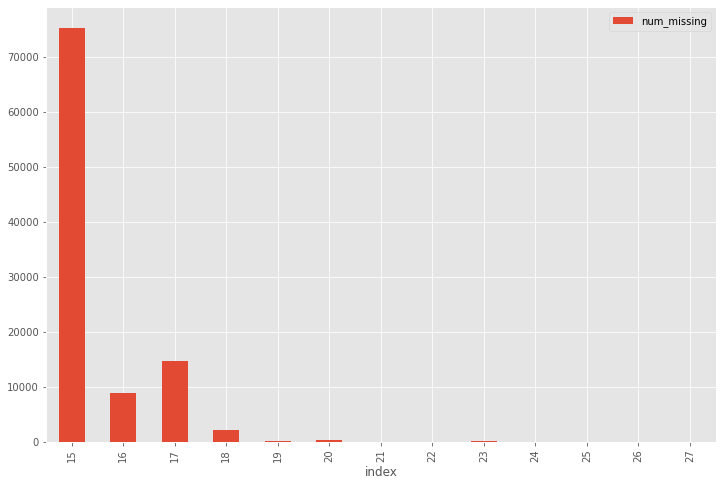

In [13]:
# Plot a missing data histogram
for col in rats.columns:
    missing = rats[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        rats['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in rats.columns if 'ismissing' in col]
rats['num_missing'] = rats[ismissing_cols].sum(axis=1)

rats['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [25]:
# Handle any missing data in your dataframe.
cols_to_drop= ['Landmark', 'Ferry Terminal Name', 'Ferry Direction', 'Garage Lot Name', 'Road Ramp', 'Bridge Highway Segment', 'Bridge Highway Name', 'Bridge Highway Direction', 'Facility Type', 'Intersection Street 1', 'Intersection Street 2', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location']

rats_less_missing = rats.drop(cols_to_drop, axis= 1)

rats_less_missing.describe()


,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,num_missing
count,1.019140e+05,101578.000000,1.012080e+05,101208.000000,101208.000000,101208.000000,101914.000000
mean,2.815864e+07,10728.680895,1.002473e+06,208639.988953,40.739304,-73.934206,15.491974
std,6.015376e+06,631.206648,1.958043e+04,29956.193531,0.082224,0.070617,0.996092
min,1.146439e+07,83.000000,9.134950e+05,121350.000000,40.499502,-74.254437,15.000000
25%,2.341452e+07,10086.250000,9.936100e+05,186934.000000,40.679740,-73.966216,15.000000
50%,2.883680e+07,10472.000000,1.001398e+06,203425.500000,40.725009,-73.938112,15.000000
75%,3.346014e+07,11222.000000,1.011951e+06,236364.000000,40.815428,-73.899963,16.000000
max,3.719700e+07,100354.000000,1.066922e+06,271876.000000,40.912869,-73.701632,27.000000


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

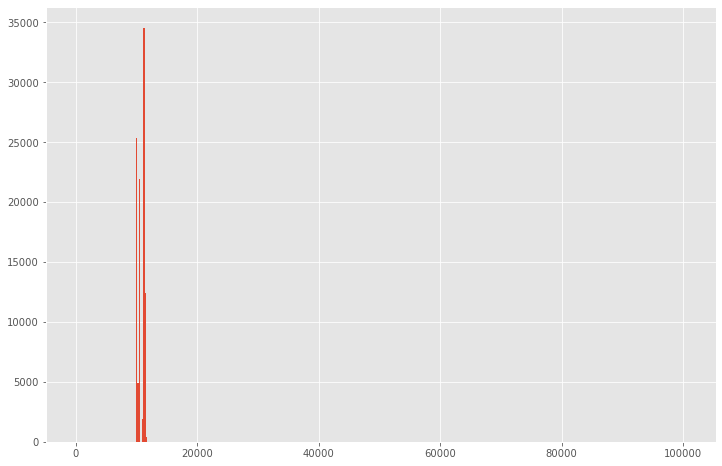

In [10]:
# Plot a histogram to see if there are any outliers.
rats['Incident Zip'].hist(bins=500)

<AxesSubplot:>

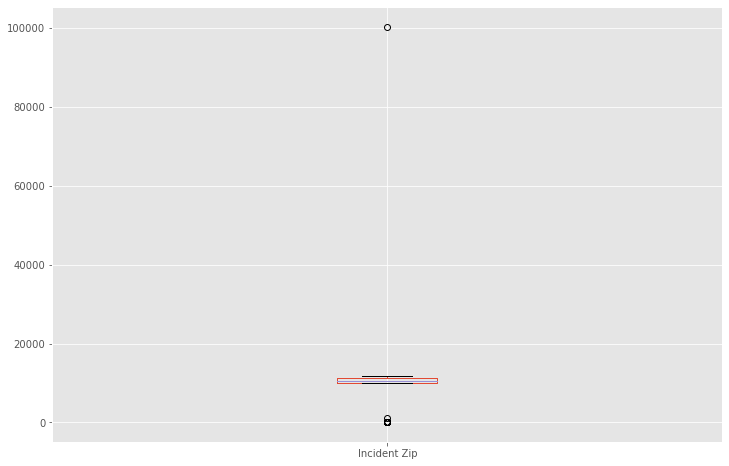

In [14]:
rats.boxplot(column=['Incident Zip'])

In [56]:
# Use the describe() method
rats['Incident Zip'].describe()

count    101578.000000
mean      10728.680895
std         631.206648
min          83.000000
25%       10086.250000
50%       10472.000000
75%       11222.000000
max      100354.000000
Name: Incident Zip, dtype: float64

<AxesSubplot:>

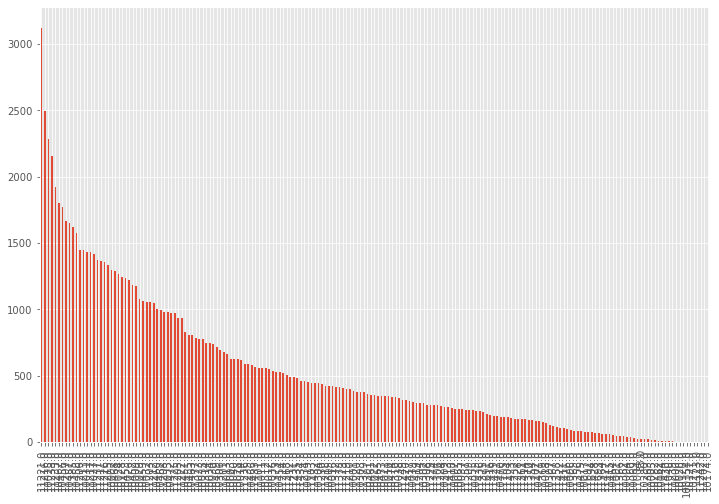

In [46]:
# Plot a bar chart
rats['Incident Zip'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [70]:
# Handle any outliers in your dataframe

#I'm struggling with the syntax to remove outliers - most data here is categorical. 
# The min/max for zip have too few/many digits - I cannot find good syntax to drop these 

zip = str(zip)

for zip in rats['Incident Zip']:
    if len(zip) < 5 or len(zip) > 5:
        rats['Incident Zip'].drop(zip)


TypeError: object of type 'float' has no len()

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [67]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(rats.index)
low_info_cols = []

for col in rats.columns:
    cnts = rats[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_info_cols.append(col)
        print('{0}: {1:5f}%'.format(col, top_pct*100))
        print(cnts)
        
#Many of the columns have the same entry (Agency, Agency Name, etc.)
#For any columns with .90 of the same answer I would drop those entirely it adds nothing

Agency: 100.000000%
DOHMH    101914
Name: Agency, dtype: int64
Agency Name: 100.000000%
Department of Health and Mental Hygiene    101914
Name: Agency Name, dtype: int64
Complaint Type: 100.000000%
Rodent    101914
Name: Complaint Type, dtype: int64
Descriptor: 100.000000%
Rat Sighting    101914
Name: Descriptor, dtype: int64
Intersection Street 1: 91.242616%
NaN                          92989
BROADWAY                       246
2 AVENUE                       167
AMSTERDAM AVENUE               111
LEXINGTON AVENUE               105
                             ...  
MANHATTAN COLLEGE PARKWAY        1
HOLLY AVENUE                     1
POMPEY AVENUE                    1
BATH AVENUE                      1
WEST  183 STREET                 1
Name: Intersection Street 1, Length: 2437, dtype: int64
Intersection Street 2: 91.242616%
NaN                92989
BROADWAY             152
2 AVENUE              73
RIVERSIDE DRIVE       50
5 AVENUE              46
                   ...  
SHORE BOULEVA

In [44]:
# Look for duplicates. How will you handle any duplicates?

#I think my attempt is incorrect - feel like I am misisng something here [rats.drop_duplicates]

rats_dupped = rats.drop_duplicates()

print(rats.shape)
rats_dupped.shape

(101914, 85)


(101914, 85)

In [35]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
Maybe the scope or time series of a project could change, new data comes out, etc and you might want to drop entries older than x date

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [60]:
# Try to convert all the strings in a column to lower or upper case. 
rats['Incident Address'].value_counts(dropna=False)
rats['Incident Address'].str.lower().value_counts(dropna=False)

NaN                    9074
2131 wallace avenue     186
95 eastern parkway      176
651 brooklyn avenue     127
2486 davidson ave        88
                       ... 
1850 ocean parkway        1
117-27 203 street         1
956 dumont avenue         1
184 hopkins avenue        1
105 long pond lane        1
Name: Incident Address, Length: 51602, dtype: int64